# **INSTALLS**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install openai
!pip install PyMuPDF
!pip install gradio

# osm
!pip install osmnx
!pip install geopy
!pip install scikit-learn

# gee topo
!pip install
!pip install earthengine-api
!pip install folium
!pip install geemap
!pip install geopandas
!pip install rasterio
!pip install numpy pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.6/99.6 kB 3.1 MB/s eta 0:00:00
ERROR: You must give at least one requirement to install (see "pip help install")
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# **IMPORTS**

In [ ]:
import openai
import datetime
import gradio
from openai import OpenAI
import json
from google.colab import files
import io
import fitz
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_distances

#OSM
import geopandas
import matplotlib.pyplot as plt
import osmnx
import seaborn as sns
from shapely.geometry import Point, LineString

#GEE
from PIL import Image
import os
import ee
import folium
import geemap

# **API KEY**

In [ ]:
# Replace 'your-api-key' with your actual API key
client = OpenAI(api_key="")

# **EXPERIMENT #1**

In [ ]:
# conversation log aka 'shorterm memory'. Each message follows a specific format  (design choice by openAI that we need to follow)
#
conversation_log = [
    {"role": "user", "content": "Hi, I am Alex. may i introduce myself? "},
    {"role": "assistant", "content": "sure, go along!"},
    {"role": "user", "content": "I i have one dog called sally and I love cooking, i have an allergy against rice, pasta and bread, and i am a big fan of cabbage"},
    {"role": "assistant", "content": "nice to meet you!"}
]

In [ ]:
input = conversation_log + [{"role": "user", "content": "please suggest a recipe i can cook for myself tonight"}]

response = client.chat.completions.create(
        model="gpt-3.5-turbo-1106",
        messages= input)

In [ ]:
answer = response.dict()["choices"][0]["message"]["content"]
answer

<ipython-input-6-9c7e76eb201d>:1: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  answer = response.dict()["choices"][0]["message"]["content"]


"How about trying a crispy cabbage stir-fry with your choice of protein (chicken, tofu, etc.)? You can add in your favorite veggies and seasonings and serve it with quinoa or another grain of your choice. It's a simple and tasty dish that can be easily customized to fit your dietary needs."

# **EXPERIMENT #2: MAKING TWO CHATBOX TALK**

In [ ]:
# wrap the API call into a function for easy re-use
def ask_chatgpt_statefull(messages, system_message="you are a helpfull assistant", model="gpt-4o"):

    # construct conversation history with seperate/swapable system message
    messages = [
        {"role": "system", "content": system_message},
        *messages
    ]

    response = client.chat.completions.create(
        model=model,
        messages=messages,
        presence_penalty = 1
    )
    # Convert the response to a dictionary
    response = response.dict()

    # Accessing the content of the response
    return response['choices'][0]['message']['content']

In [ ]:
# initialize the conversation
conversation_log = []

for i in range(4):
  # call chatGPT
  description = ask_chatgpt_statefull(conversation_log,
                                    system_message="you are interviewing the user for a job in computer science. Ask them 3 questions to test their qualification, one by one. Then make your final decision")

  # add response to conversation_log in the chatgpt schema & print for review
  # Note, we add instructions for the second API call at the end
  conversation_log.append({"role": "assistant", "content":description+ ". So, dear appllicant please asnwer my question:" })
  print("Bot A: ", description, "\n__________")


 # call the chatGPT API again with the updated conversation_log
  answer = ask_chatgpt_statefull(conversation_log, system_message="You act as the user in this conversation")
  print("Bot B: ", answer, "\n=========")
  conversation_log.append({"role": "user", "content":answer })


<ipython-input-7-043d84b22ebd>:16: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  response = response.dict()


Bot A:  Great! Let's get started with your interview. Here's the first question:

**Question 1:** Can you explain what object-oriented programming is and describe the four main principles of OOP?

Please go ahead with your response. 
__________
Bot B:  Object-oriented programming (OOP) is a programming paradigm centered around the concept of objects, which can contain data in the form of fields (often called attributes or properties) and code in the form of procedures (often known as methods). OOP is designed to model real-world entities using classes and objects, promoting modularity and reusability of code.

The four main principles of OOP are:

1. **Encapsulation**: This principle involves bundling the data (attributes) and methods that operate on the data into a single unit or class. It restricts direct access to some of an object's components and can prevent unintended interference and misuse of the methods and data. Encapsulation is often achieved through the use of access modifi

In [ ]:
conversation_log

[{'role': 'assistant',
  'content': "Great! Let's get started with your interview. Here's the first question:\n\n**Question 1:** Can you explain what object-oriented programming is and describe the four main principles of OOP?\n\nPlease go ahead with your response.. So, dear appllicant please asnwer my question:"},
 {'role': 'user',
  'content': "Object-oriented programming (OOP) is a programming paradigm centered around the concept of objects, which can contain data in the form of fields (often called attributes or properties) and code in the form of procedures (often known as methods). OOP is designed to model real-world entities using classes and objects, promoting modularity and reusability of code.\n\nThe four main principles of OOP are:\n\n1. **Encapsulation**: This principle involves bundling the data (attributes) and methods that operate on the data into a single unit or class. It restricts direct access to some of an object's components and can prevent unintended interference 

# **EXPERIMENT #3**

chat gpt JSONcall:

In [ ]:
def callGPT_JSONMode(messages, model="gpt-4o"):
    response = client.chat.completions.create(
        model=model,
        response_format={"type": "json_object"},
        messages=conversationLog,
    )
    return response.choices[0].message.model_dump()["content"]

osm map generator:

In [ ]:

# Authenticate and initialize
ee.Authenticate()  # Run this only once; follow the on-screen instructions
# Explicitly set the project ID
ee.Initialize(project='ee-') # Replace 'your-project-id' with your actual Google Cloud project ID

FILE SETUP

In [ ]:
import os

def setup_directories():
    """Ensures all required directories exist in Google Drive before saving files."""
    base_dir = "/content/drive/MyDrive/amoebas_studio/img/"
    folders = {
        "Layout": os.path.join(base_dir, "Layout"),
        "Elevation": os.path.join(base_dir, "Elevation"),
        "Elevation_TIFF": os.path.join(base_dir, "Elevation_TIFF"),
        "Numpy": os.path.join(base_dir, "Numpy"),
        "Overlap": os.path.join(base_dir, "Overlap"),
        "Metadata": os.path.join(base_dir, "Metadata")
    }

    # ✅ Create all directories if they do not exist
    for name, path in folders.items():
        os.makedirs(path, exist_ok=True)

    print("✅ All necessary directories are set up in Google Drive.")
    return folders  # Returns the dictionary of paths for easy access


In [ ]:
def define_file_paths(city_name, country_name):
    """Generates file paths for each data type based on city and country."""
    # Ensure city and country names are formatted correctly for filenames
    base_name = f"{country_name}_{city_name}".replace(" ", "_")

    # Get the folder paths from the setup function
    folders = setup_directories()

    file_paths = {
        "layout_png": os.path.join(folders["Layout"], f"{base_name}_street_network.png"),
        "elevation_png": os.path.join(folders["Elevation"], f"{base_name}_elevation.png"),
        "elevation_tiff": os.path.join(folders["Elevation_TIFF"], f"{base_name}_elevation.tif"),
        "elevation_npy": os.path.join(folders["Numpy"], f"{base_name}_elevation.npy"),
        "overlay_png": os.path.join(folders["Overlap"], f"{base_name}_overlay.png"),
        "metadata_txt": os.path.join(folders["Metadata"], f"{base_name}_metadata.txt"),
    }

    return file_paths  # ✅ Returns a dictionary with all the necessary file paths


STREET LAYOUT

In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt

def generate_street_layout(city_name, country_name):
    """
    Generates a 1024x1024 resolution street layout PNG for a given city and country.
    Saves the file in the correct Google Drive directory.
    """
    try:
        # ✅ Get correct file paths
        paths = define_file_paths(city_name, country_name)
        layout_file = paths["layout_png"]  # Save street layout in correct folder

        # ✅ Generate Street Layout Graph
        place_name = f"{city_name}, {country_name}"  # Ensure accurate location search
        graph = ox.graph_from_place(place_name, network_type='drive')
        _, edges = ox.graph_to_gdfs(graph)

        # ✅ Create a 1024x1024 figure
        fig, ax = plt.subplots(figsize=(10.24, 10.24))  # DPI scaling to match 1024x1024 resolution
        ox.plot_graph(graph, ax=ax, node_size=0, bgcolor='#FFFFFF', edge_color='#000000', edge_linewidth=0.2, show=False)

        # ✅ Save PNG in 1024x1024 resolution inside Google Drive
        fig.savefig(layout_file, dpi=100, bbox_inches='tight', pad_inches=0)
        plt.close(fig)  # Free memory

        print(f"✅ Street layout saved for {city_name}, {country_name}: {layout_file}")
        return layout_file  # Return path for reference

    except Exception as e:
        print(f"❌ Error generating street layout for {city_name}, {country_name}: {e}")
        return None


In [ ]:
def generateGeoData(operation_type,city_name):

  if operation_type == "layout":
    graph = osmnx.graph_from_place(city_name, network_type='drive')
    _, edges = osmnx.graph_to_gdfs(graph)

    # plotting the projection
    fig, ax = osmnx.plot_graph(graph, node_size= 0, bgcolor= '#FFFFFF', edge_color='#000000', edge_linewidth= 0.2)
    image_path = f"/content/drive/MyDrive/amoebas_studio/img/Layout/{city_name}_street_network.png"
    fig.savefig(image_path, dpi=400, bbox_inches='tight')
    return fig, ax

  elif operation_type == "topography":
    # Import NASADEM dataset and select the elevation band
    dataset = ee.Image('NASA/NASADEM_HGT/001')
    elevation = dataset.select('elevation')

    # Get the boundary of Barcelona from OpenStreetMap or Earth Engine datasets
    barcelona = ee.FeatureCollection("FAO/GAUL/2015/level2") \
        .filter(ee.Filter.eq('ADM2_NAME', f'{city_name}'))  # Filtering for Barcelona

    # Clip the elevation map to the Barcelona boundary
    elevation_barcelona = elevation.clip(barcelona)

    # Define Black & White visualization parameters
    elevationVis = {
        'min': 0,
        'max': 2000,
        'palette': ['black', 'white']  # Black for low areas, white for high elevations
    }

    # Create an interactive Folium map centered at Barcelona
    map_center = [41.3851, 2.1734]  # Latitude, Longitude of Barcelona
    m = geemap.Map(center=map_center, zoom=12)

    # Add the clipped Barcelona elevation layer to the map
    m.addLayer(elevation_barcelona, elevationVis, f"{city_name} Elevation")

    # Display the interactive map
    return m
  else:
    return "no geo data"

In [ ]:
generateGeoData("topography", "Barcelona")

# **GEE TOPO DATA (MISRA)**

# whole world

In [ ]:
# Import NASADEM dataset and select the elevation band
dataset = ee.Image('NASA/NASADEM_HGT/001')
elevation = dataset.select('elevation')

# Apply a mask to remove values ≤ 0 (e.g., ocean areas)
elevation_masked = elevation.updateMask(elevation.gt(0))

# Define Black & White visualization parameters
elevationVis = {
    'min': 0,
    'max': 2000,
    'palette': ['black', 'white']  # Black for low areas, white for high elevations
}

# Create an interactive Folium map centered at Barcelona (or any location)
map_center = [41.3851, 2.1734]  # Barcelona coordinates
m = geemap.Map(center=map_center, zoom=10)

# Add the elevation layer to the map in black & white
m.addLayer(elevation_masked, elevationVis, "Black & White Elevation")

# Display the interactive map
m

# restricted to city

In [ ]:
def topography(city_name):
  # Import NASADEM dataset and select the elevation band
  dataset = ee.Image('NASA/NASADEM_HGT/001')
  elevation = dataset.select('elevation')

  # Get the boundary of Barcelona from OpenStreetMap or Earth Engine datasets
  barcelona = ee.FeatureCollection("FAO/GAUL/2015/level2") \
      .filter(ee.Filter.eq('ADM2_NAME', f'{city_name}'))  # Filtering for Barcelona

  # Clip the elevation map to the Barcelona boundary
  elevation_barcelona = elevation.clip(barcelona)

  # Define Black & White visualization parameters
  elevationVis = {
      'min': 0,
      'max': 2000,
      'palette': ['black', 'white']  # Black for low areas, white for high elevations
  }

  # Create an interactive Folium map centered at Barcelona
  map_center = [41.3851, 2.1734]  # Latitude, Longitude of Barcelona
  m = geemap.Map(center=map_center, zoom=12)

  # Add the clipped Barcelona elevation layer to the map
  m.addLayer(elevation_barcelona, elevationVis, f"{city_name} Elevation")

  # Display the interactive map
  return m

# png, tiff and numpy array elevation of the city

*   Liste öğesi
*   Liste öğesi



In [ ]:

import ee
import geemap
import rasterio
import numpy as np
import geopandas as gpd
from geopy.geocoders import Nominatim
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from PIL import Image
import os
import geemap
import ee
from geopy.geocoders import Nominatim

# ✅ Function to get city boundaries from OpenStreetMap (OSM)
def get_osm_boundary(city_name):
    geolocator = Nominatim(user_agent="geoapi")
    location = geolocator.geocode(city_name, exactly_one=True)

    if location:
        bbox = location.raw['boundingbox']
        lat_min, lat_max, lon_min, lon_max = map(float, bbox)
        return ee.Geometry.Rectangle([lon_min, lat_min, lon_max, lat_max])  # Use OSM boundary
    else:
        return None

# ✅ Function to generate elevation as a NumPy array and save in Google Drive
def generate_elevation_numpy(city_name, country_name):
    print(f"🔍 Searching for {city_name} in OpenStreetMap...")

    # Step 1: Fetch city boundary from OSM
    bbox = get_osm_boundary(city_name)
    if bbox is None:
        print(f"❌ Error: Could not find {city_name} boundary in OSM.")
        return None, None

    print(f"✅ City boundary found! Clipping elevation map to {city_name}...")

    # Step 2: Load the NASADEM elevation dataset
    dataset = ee.Image('NASA/NASADEM_HGT/001')
    elevation = dataset.select('elevation')

    # Step 3: Clip the elevation data to the city's bounding box
    elevation_city = elevation.clip(bbox)

    # ✅ Get the correct file paths
    paths = define_file_paths(city_name, country_name)
    tif_file = paths["elevation_tiff"]  # Save TIFF in /Elevation_TIFF/
    png_file = paths["elevation_png"]  # Save PNG in /Elevation/
    npy_file = paths["elevation_npy"]  # Save NumPy array in /Numpy/
    metadata_file = paths["metadata_txt"]  # Save metadata in /Metadata/

    # Step 5: Export the elevation map as GeoTIFF
    export_scale = 100  # Adjust resolution if needed
    geemap.ee_export_image(
        elevation_city, filename=tif_file, scale=export_scale, region=bbox, file_per_band=False
    )
    print(f"✅ GeoTIFF saved: {tif_file}")

    # Step 6: Convert GeoTIFF to PNG & NumPy Array
    if os.path.exists(tif_file):
        with rasterio.open(tif_file) as src:
            array = src.read(1)  # Read first band

            # Replace NoData values with 0
            array[array == src.nodata] = 0

            # Save as NumPy array for AI processing
            np.save(npy_file, array)
            print(f"✅ NumPy array saved: {npy_file}")

            # Normalize elevation values (0-255 grayscale) for visualization
            min_val, max_val = np.percentile(array, (2, 98))
            normalized_array = ((array - min_val) / (max_val - min_val)) * 255
            normalized_array = np.clip(normalized_array, 0, 255).astype(np.uint8)

            # Convert to grayscale image with 1024x1024 resolution
            img = Image.fromarray(normalized_array)
            img = img.convert("L")
            img = img.resize((1024, 1024), Image.Resampling.LANCZOS)  # Resize to 1024x1024

            # Save the PNG
            img.save(png_file)

            # Step 7: Show the processed elevation map
            plt.figure(figsize=(8, 8))
            plt.imshow(img, cmap="gray")
            plt.axis("off")
            plt.title(f"{city_name} Elevation Map")
            plt.show()

        print(f"✅ PNG saved in Google Drive: {png_file}")

        # ✅ Create Metadata File
        with open(metadata_file, "w") as meta_file:
            meta_file.write(f"City: {city_name}\n")
            meta_file.write(f"Country: {country_name}\n")
            meta_file.write(f"Elevation PNG File: {png_file}\n")
            meta_file.write(f"Elevation TIFF File: {tif_file}\n")
            meta_file.write(f"Elevation NumPy File: {npy_file}\n")

        print(f"✅ Metadata saved in Google Drive: {metadata_file}")

        return npy_file, png_file

    else:
        print("❌ Error: GeoTIFF file not found.")
        return None, None


# TO OVERLAP TOPO AND STREET LAYOUT

In [ ]:
import cv2


# ✅ Function to overlay elevation and street layout maps
def overlay_maps(city_name, country_name):
    """
    Overlays elevation and street layout maps, saves to Google Drive in 1024x1024 resolution,
    and generates metadata.
    """
    # ✅ Get correct file paths
    paths = define_file_paths(city_name, country_name)
    elevation_png_file = paths["elevation_png"]  # Elevation PNG (stored in /Elevation/)
    elevation_tiff_file = paths["elevation_tiff"]  # Elevation TIFF (stored in /Elevation_TIFF/)
    street_file = paths["layout_png"]  # Street layout PNG from /Layout/
    overlay_file = paths["overlay_png"]  # Save overlay in /Overlap/
    metadata_file = paths["metadata_txt"]  # Save metadata in /Metadata/

    # ✅ Check if both files exist
    if not os.path.exists(elevation_png_file):
        print(f"❌ Error: Elevation map for {city_name}, {country_name} not found!")
        return None
    if not os.path.exists(street_file):
        print(f"❌ Error: Street layout for {city_name}, {country_name} not found!")
        return None

    # ✅ Load images
    elevation_img = cv2.imread(elevation_png_file, cv2.IMREAD_GRAYSCALE)  # Load elevation as grayscale
    street_img = cv2.imread(street_file, cv2.IMREAD_UNCHANGED)  # Load street layout as color

    # ✅ Ensure both images are resized to 1024x1024
    elevation_resized = cv2.resize(elevation_img, (1024, 1024))
    street_resized = cv2.resize(street_img, (1024, 1024))

    # ✅ Convert elevation to 3-channel grayscale (for blending)
    elevation_colored = cv2.cvtColor(elevation_resized, cv2.COLOR_GRAY2BGR)

    # ✅ Convert street layout to white edges on transparent background
    street_edges = cv2.Canny(street_resized, 50, 150)  # Edge detection
    street_overlay = np.zeros_like(elevation_colored)
    street_overlay[street_edges > 0] = (0, 0, 255)  # Red street lines

    # ✅ Blend the images with transparency
    overlay_result = cv2.addWeighted(elevation_colored, 0.7, street_overlay, 0.5, 0)

    # ✅ Save the overlay image in /Overlap/
    cv2.imwrite(overlay_file, overlay_result)
    print(f"✅ Overlay saved in Google Drive: {overlay_file}")

    # ✅ Show the overlay image
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(overlay_result, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"Overlay of {city_name} Elevation & Streets")
    plt.show()

    # ✅ Create Metadata File for Overlays
    with open(metadata_file, "w") as meta_file:
        meta_file.write(f"City: {city_name}\n")
        meta_file.write(f"Country: {country_name}\n")
        meta_file.write(f"Elevation PNG File: {elevation_png_file}\n")
        meta_file.write(f"Street Layout PNG File: {street_file}\n")
        meta_file.write(f"Overlay PNG File: {overlay_file}\n")

    print(f"✅ Metadata saved in Google Drive: {metadata_file}")

    return overlay_file


# CITIES

In [ ]:
# Update the file path for the cities list
cities_file_path = "/content/drive/MyDrive/amoebas_studio/img/top_1000_cities.csv"

# Load the city list from Google Drive
df_cities = pd.read_csv(cities_file_path)

# Display the first few cities for verification
df_cities.head()

City               Country
0  Karachi              Pakistan
1   Madrid                 Spain
2   Samara                Russia
3     Omsk                Russia
4    Dubai  United Arab Emirates

# LOOP

In [ ]:
import os
import time

# ✅ Loop through the list of cities and generate maps
for index, row in df_cities.iterrows():
    city = row["City"]

    print(f"\n🌍 Processing: {city}...\n")

    try:
        # ✅ Get correct file paths
        paths = define_file_paths(city, "Unknown")  # Ignore country field
        elevation_png_file = paths["elevation_png"]
        elevation_tiff_file = paths["elevation_tiff"]
        street_file = paths["layout_png"]
        overlay_file = paths["overlay_png"]
        npy_file = paths["elevation_npy"]
        metadata_file = paths["metadata_txt"]

        # ✅ Check if overlay already exists, skip if so
        if os.path.exists(overlay_file):
            print(f"⚠️ {city} already processed, skipping...")
            continue

        # ✅ Generate Elevation Data (TIFF, PNG, NumPy)
        print("🔄 Generating elevation data (TIFF, PNG, NumPy)...")
        elevation_result = generate_elevation_numpy(city, "Unknown")
        if elevation_result is None:
            print(f"⚠️ Skipping {city} due to missing elevation data.")
            continue  # Skip and move to next city

        # ✅ Generate Street Layout Map
        print("🔄 Generating street layout map...")
        street_result = generate_street_layout(city, "Unknown")
        if street_result is None:
            print(f"⚠️ Skipping {city} due to missing street data.")
            continue  # Skip and move to next city

        # ✅ Generate Overlay of Topography & Street Layout
        print("🔄 Generating overlay map...")
        overlay_result = overlay_maps(city, "Unknown")
        if overlay_result is None:
            print(f"⚠️ Skipping {city} due to overlay generation failure.")
            continue  # Skip and move to next city

        print(f"✅ Completed: {city} ✅\n")

        # ✅ Add a short delay to avoid API rate limits
        time.sleep(2)

    except Exception as e:
        print(f"❌ Error processing {city}: {e}")
        print("🚨 Continuing to the next city instead of stopping execution.")



🌍 Processing: Karachi...

✅ All necessary directories are set up in Google Drive.
🔄 Generating elevation data (TIFF, PNG, NumPy)...
🔍 Fetching bounding box for Karachi...
✅ Bounding box confirmed, generating elevation map...
✅ All necessary directories are set up in Google Drive.
Generating URL ...
Please wait ...
Data downloaded to /content/drive/MyDrive/amoebas_studio/img/Elevation_TIFF/Unknown_Karachi_elevation.tif
✅ GeoTIFF saved: /content/drive/MyDrive/amoebas_studio/img/Elevation_TIFF/Unknown_Karachi_elevation.tif
✅ PNG saved: /content/drive/MyDrive/amoebas_studio/img/Elevation/Unknown_Karachi_elevation.png
🔄 Generating street layout map...
✅ All necessary directories are set up in Google Drive.
❌ Error generating street layout for Karachi, Unknown: Nominatim did not geocode query 'Karachi, Unknown' to a geometry of type (Multi)Polygon.
⚠️ Skipping Karachi due to missing street data.

🌍 Processing: Madrid...

✅ All necessary directories are set up in Google Drive.
🔄 Generating e

KeyboardInterrupt: 

okay this loop is better but gets stuck with unknown countries!!!!


🌍 Processing: Karachi, Pakistan...

✅ All necessary directories are set up in Google Drive.
🔄 Generating elevation data (TIFF, PNG, NumPy)...
🔍 Searching for Karachi in OpenStreetMap...
✅ City boundary found! Clipping elevation map to Karachi...
✅ All necessary directories are set up in Google Drive.
Generating URL ...
Please wait ...
Data downloaded to /content/drive/MyDrive/amoebas_studio/img/Elevation_TIFF/Pakistan_Karachi_elevation.tif
✅ GeoTIFF saved: /content/drive/MyDrive/amoebas_studio/img/Elevation_TIFF/Pakistan_Karachi_elevation.tif
✅ NumPy array saved: /content/drive/MyDrive/amoebas_studio/img/Numpy/Pakistan_Karachi_elevation.npy


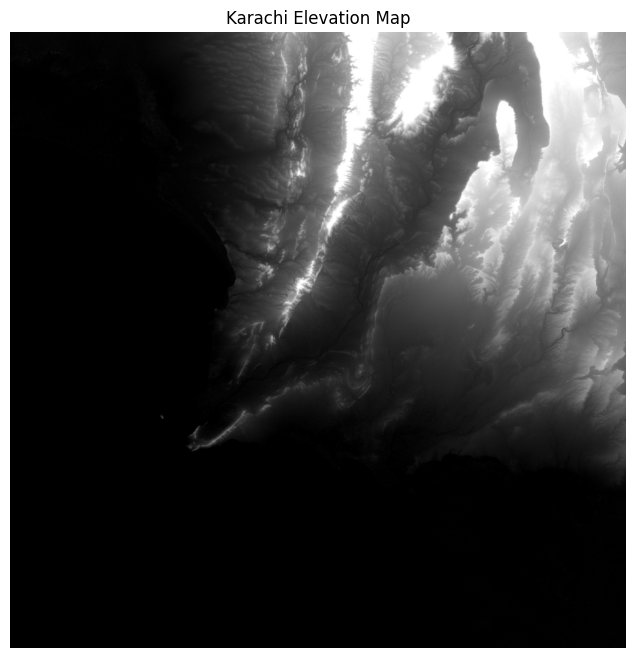

✅ PNG saved in Google Drive: /content/drive/MyDrive/amoebas_studio/img/Elevation/Pakistan_Karachi_elevation.png
✅ Metadata saved in Google Drive: /content/drive/MyDrive/amoebas_studio/img/Metadata/Pakistan_Karachi_metadata.txt
🔄 Generating street layout map...
✅ All necessary directories are set up in Google Drive.
✅ Street layout saved for Karachi, Pakistan: /content/drive/MyDrive/amoebas_studio/img/Layout/Pakistan_Karachi_street_network.png
🔄 Generating overlay map...
✅ All necessary directories are set up in Google Drive.
✅ Overlay saved in Google Drive: /content/drive/MyDrive/amoebas_studio/img/Overlap/Pakistan_Karachi_overlay.png


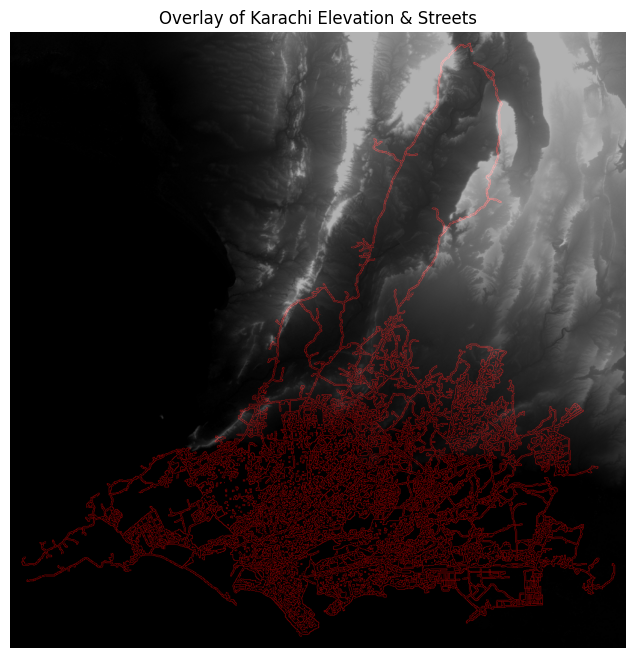

✅ Metadata saved in Google Drive: /content/drive/MyDrive/amoebas_studio/img/Metadata/Pakistan_Karachi_metadata.txt
✅ Completed: Karachi, Pakistan ✅


🌍 Processing: Madrid, Spain...

✅ All necessary directories are set up in Google Drive.
🔄 Generating elevation data (TIFF, PNG, NumPy)...
🔍 Searching for Madrid in OpenStreetMap...
✅ City boundary found! Clipping elevation map to Madrid...
✅ All necessary directories are set up in Google Drive.
Generating URL ...
Please wait ...
Data downloaded to /content/drive/MyDrive/amoebas_studio/img/Elevation_TIFF/Spain_Madrid_elevation.tif
✅ GeoTIFF saved: /content/drive/MyDrive/amoebas_studio/img/Elevation_TIFF/Spain_Madrid_elevation.tif
✅ NumPy array saved: /content/drive/MyDrive/amoebas_studio/img/Numpy/Spain_Madrid_elevation.npy


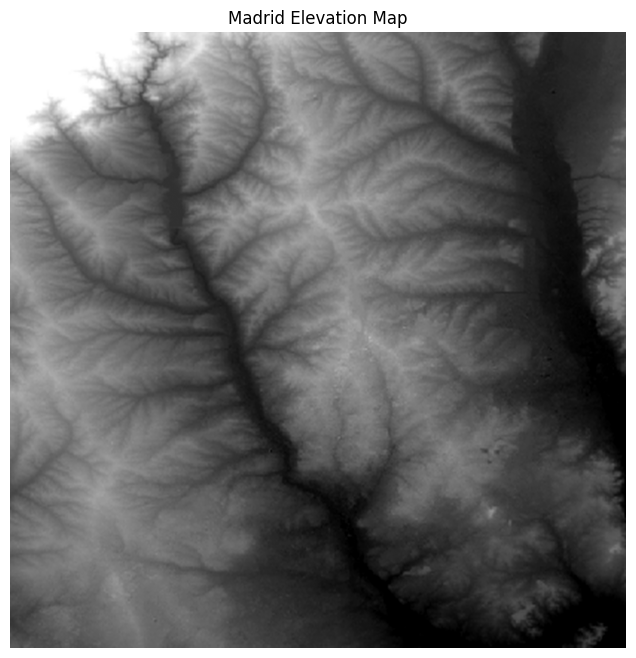

✅ PNG saved in Google Drive: /content/drive/MyDrive/amoebas_studio/img/Elevation/Spain_Madrid_elevation.png
✅ Metadata saved in Google Drive: /content/drive/MyDrive/amoebas_studio/img/Metadata/Spain_Madrid_metadata.txt
🔄 Generating street layout map...
✅ All necessary directories are set up in Google Drive.
✅ Street layout saved for Madrid, Spain: /content/drive/MyDrive/amoebas_studio/img/Layout/Spain_Madrid_street_network.png
🔄 Generating overlay map...
✅ All necessary directories are set up in Google Drive.
✅ Overlay saved in Google Drive: /content/drive/MyDrive/amoebas_studio/img/Overlap/Spain_Madrid_overlay.png


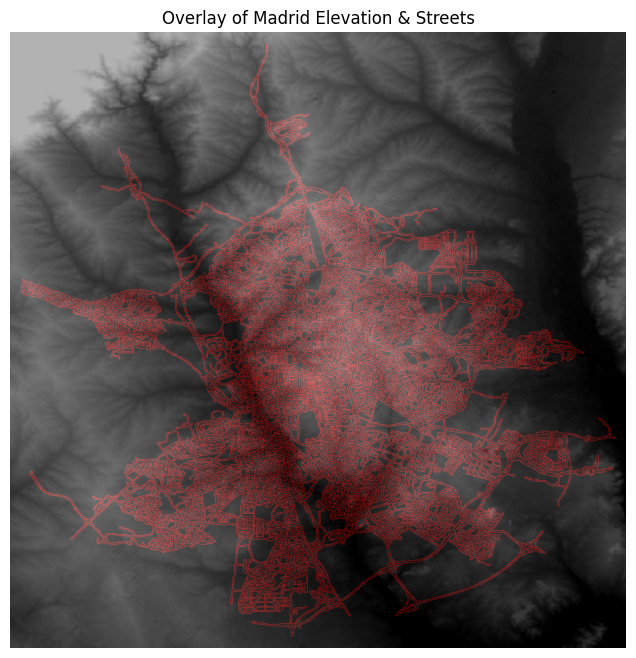

✅ Metadata saved in Google Drive: /content/drive/MyDrive/amoebas_studio/img/Metadata/Spain_Madrid_metadata.txt
✅ Completed: Madrid, Spain ✅


🌍 Processing: Samara, Russia...

✅ All necessary directories are set up in Google Drive.
🔄 Generating elevation data (TIFF, PNG, NumPy)...
🔍 Searching for Samara in OpenStreetMap...
✅ City boundary found! Clipping elevation map to Samara...
✅ All necessary directories are set up in Google Drive.
Generating URL ...
Please wait ...
Data downloaded to /content/drive/MyDrive/amoebas_studio/img/Elevation_TIFF/Russia_Samara_elevation.tif
✅ GeoTIFF saved: /content/drive/MyDrive/amoebas_studio/img/Elevation_TIFF/Russia_Samara_elevation.tif
✅ NumPy array saved: /content/drive/MyDrive/amoebas_studio/img/Numpy/Russia_Samara_elevation.npy


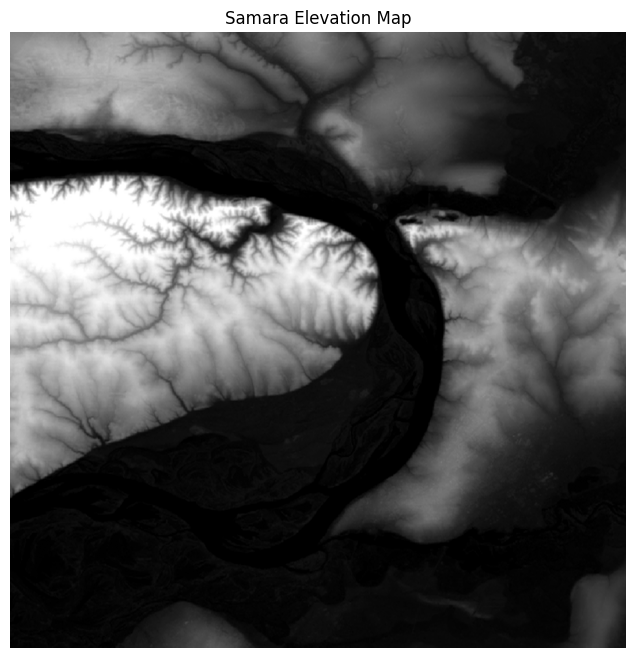

✅ PNG saved in Google Drive: /content/drive/MyDrive/amoebas_studio/img/Elevation/Russia_Samara_elevation.png
✅ Metadata saved in Google Drive: /content/drive/MyDrive/amoebas_studio/img/Metadata/Russia_Samara_metadata.txt
🔄 Generating street layout map...
✅ All necessary directories are set up in Google Drive.
✅ Street layout saved for Samara, Russia: /content/drive/MyDrive/amoebas_studio/img/Layout/Russia_Samara_street_network.png
🔄 Generating overlay map...
✅ All necessary directories are set up in Google Drive.
✅ Overlay saved in Google Drive: /content/drive/MyDrive/amoebas_studio/img/Overlap/Russia_Samara_overlay.png


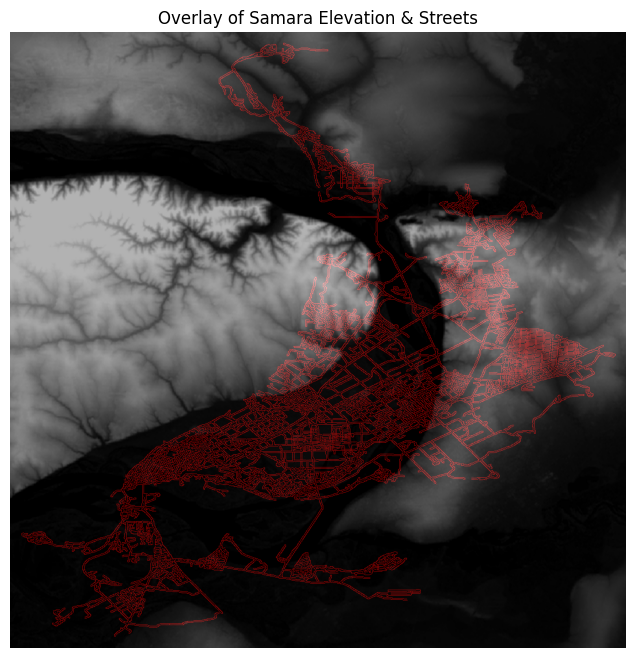

✅ Metadata saved in Google Drive: /content/drive/MyDrive/amoebas_studio/img/Metadata/Russia_Samara_metadata.txt
✅ Completed: Samara, Russia ✅


🌍 Processing: Omsk, Russia...

✅ All necessary directories are set up in Google Drive.
🔄 Generating elevation data (TIFF, PNG, NumPy)...
🔍 Searching for Omsk in OpenStreetMap...
✅ City boundary found! Clipping elevation map to Omsk...
✅ All necessary directories are set up in Google Drive.
Generating URL ...
Please wait ...
Data downloaded to /content/drive/MyDrive/amoebas_studio/img/Elevation_TIFF/Russia_Omsk_elevation.tif
✅ GeoTIFF saved: /content/drive/MyDrive/amoebas_studio/img/Elevation_TIFF/Russia_Omsk_elevation.tif
✅ NumPy array saved: /content/drive/MyDrive/amoebas_studio/img/Numpy/Russia_Omsk_elevation.npy


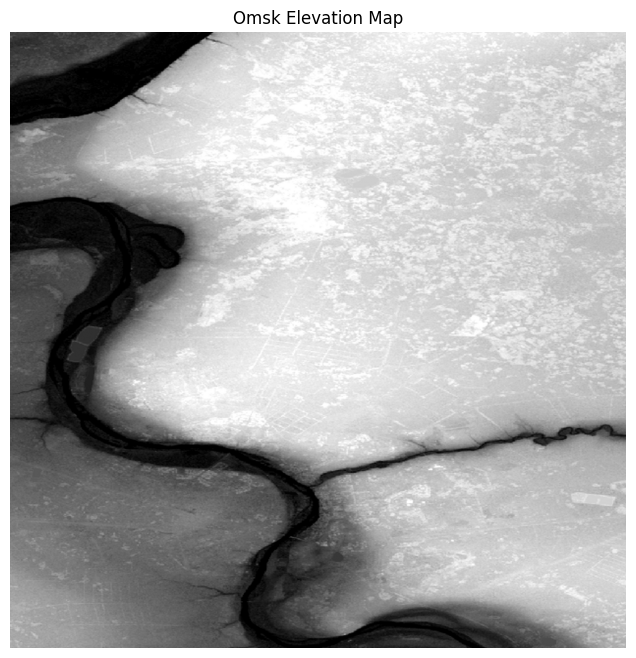

✅ PNG saved in Google Drive: /content/drive/MyDrive/amoebas_studio/img/Elevation/Russia_Omsk_elevation.png
✅ Metadata saved in Google Drive: /content/drive/MyDrive/amoebas_studio/img/Metadata/Russia_Omsk_metadata.txt
🔄 Generating street layout map...
✅ All necessary directories are set up in Google Drive.
✅ Street layout saved for Omsk, Russia: /content/drive/MyDrive/amoebas_studio/img/Layout/Russia_Omsk_street_network.png
🔄 Generating overlay map...
✅ All necessary directories are set up in Google Drive.
✅ Overlay saved in Google Drive: /content/drive/MyDrive/amoebas_studio/img/Overlap/Russia_Omsk_overlay.png


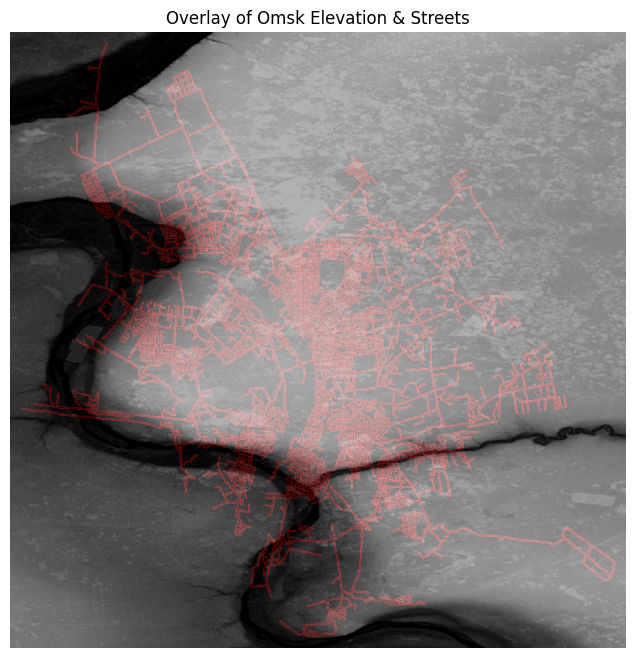

✅ Metadata saved in Google Drive: /content/drive/MyDrive/amoebas_studio/img/Metadata/Russia_Omsk_metadata.txt
✅ Completed: Omsk, Russia ✅


🌍 Processing: Dubai, United Arab Emirates...

✅ All necessary directories are set up in Google Drive.
🔄 Generating elevation data (TIFF, PNG, NumPy)...
🔍 Searching for Dubai in OpenStreetMap...
✅ City boundary found! Clipping elevation map to Dubai...
✅ All necessary directories are set up in Google Drive.
Generating URL ...
Please wait ...
Data downloaded to /content/drive/MyDrive/amoebas_studio/img/Elevation_TIFF/United_Arab_Emirates_Dubai_elevation.tif
✅ GeoTIFF saved: /content/drive/MyDrive/amoebas_studio/img/Elevation_TIFF/United_Arab_Emirates_Dubai_elevation.tif
✅ NumPy array saved: /content/drive/MyDrive/amoebas_studio/img/Numpy/United_Arab_Emirates_Dubai_elevation.npy


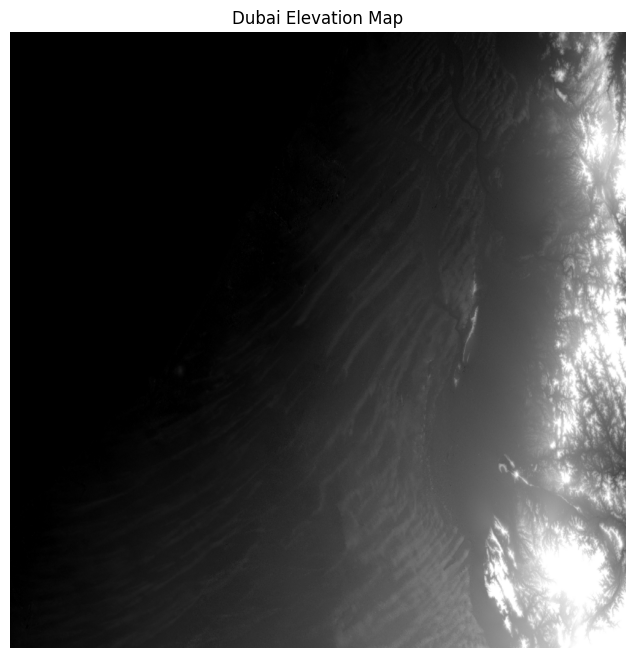

✅ PNG saved in Google Drive: /content/drive/MyDrive/amoebas_studio/img/Elevation/United_Arab_Emirates_Dubai_elevation.png
✅ Metadata saved in Google Drive: /content/drive/MyDrive/amoebas_studio/img/Metadata/United_Arab_Emirates_Dubai_metadata.txt
🔄 Generating street layout map...
✅ All necessary directories are set up in Google Drive.
✅ Street layout saved for Dubai, United Arab Emirates: /content/drive/MyDrive/amoebas_studio/img/Layout/United_Arab_Emirates_Dubai_street_network.png
🔄 Generating overlay map...
✅ All necessary directories are set up in Google Drive.
✅ Overlay saved in Google Drive: /content/drive/MyDrive/amoebas_studio/img/Overlap/United_Arab_Emirates_Dubai_overlay.png


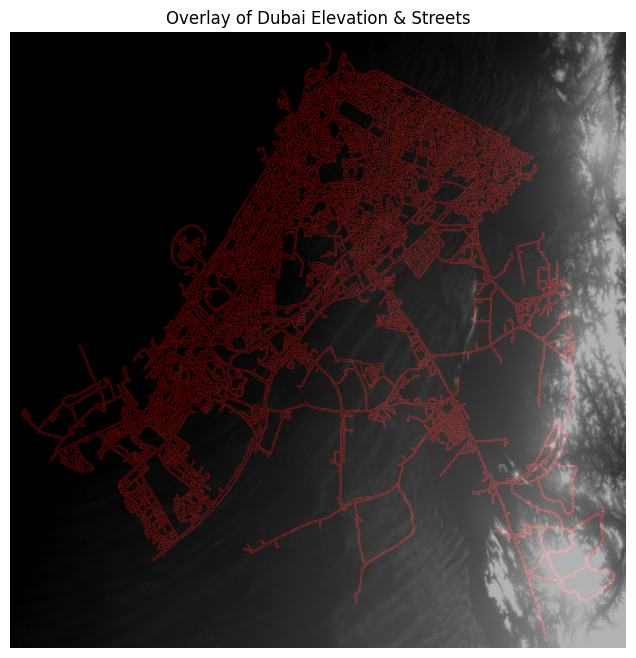

✅ Metadata saved in Google Drive: /content/drive/MyDrive/amoebas_studio/img/Metadata/United_Arab_Emirates_Dubai_metadata.txt
✅ Completed: Dubai, United Arab Emirates ✅


🌍 Processing: Riga, Latvia...

✅ All necessary directories are set up in Google Drive.
🔄 Generating elevation data (TIFF, PNG, NumPy)...
🔍 Searching for Riga in OpenStreetMap...
✅ City boundary found! Clipping elevation map to Riga...
✅ All necessary directories are set up in Google Drive.
Generating URL ...
Please wait ...
Data downloaded to /content/drive/MyDrive/amoebas_studio/img/Elevation_TIFF/Latvia_Riga_elevation.tif
✅ GeoTIFF saved: /content/drive/MyDrive/amoebas_studio/img/Elevation_TIFF/Latvia_Riga_elevation.tif
✅ NumPy array saved: /content/drive/MyDrive/amoebas_studio/img/Numpy/Latvia_Riga_elevation.npy


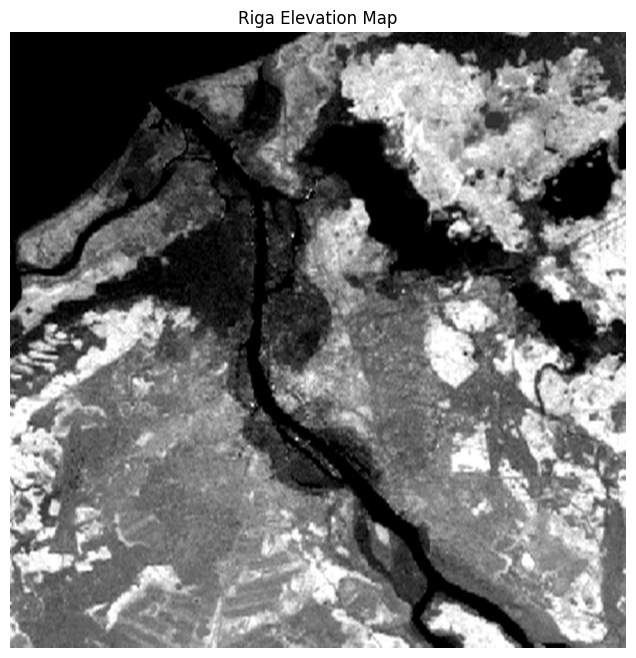

✅ PNG saved in Google Drive: /content/drive/MyDrive/amoebas_studio/img/Elevation/Latvia_Riga_elevation.png
✅ Metadata saved in Google Drive: /content/drive/MyDrive/amoebas_studio/img/Metadata/Latvia_Riga_metadata.txt
🔄 Generating street layout map...
✅ All necessary directories are set up in Google Drive.
✅ Street layout saved for Riga, Latvia: /content/drive/MyDrive/amoebas_studio/img/Layout/Latvia_Riga_street_network.png
🔄 Generating overlay map...
✅ All necessary directories are set up in Google Drive.
✅ Overlay saved in Google Drive: /content/drive/MyDrive/amoebas_studio/img/Overlap/Latvia_Riga_overlay.png


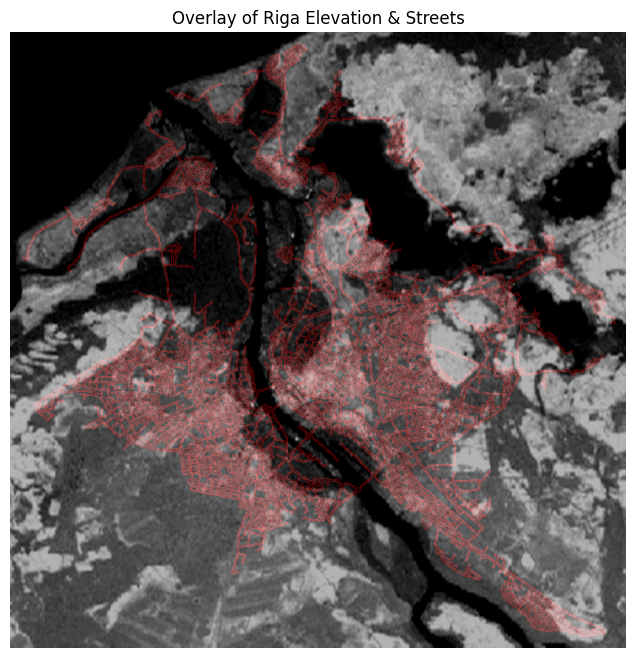

✅ Metadata saved in Google Drive: /content/drive/MyDrive/amoebas_studio/img/Metadata/Latvia_Riga_metadata.txt
✅ Completed: Riga, Latvia ✅


🌍 Processing: Montreal, Unknown...

✅ All necessary directories are set up in Google Drive.
🔄 Generating elevation data (TIFF, PNG, NumPy)...
🔍 Searching for Montreal in OpenStreetMap...
✅ City boundary found! Clipping elevation map to Montreal...
✅ All necessary directories are set up in Google Drive.
Generating URL ...
Please wait ...
Data downloaded to /content/drive/MyDrive/amoebas_studio/img/Elevation_TIFF/Unknown_Montreal_elevation.tif
✅ GeoTIFF saved: /content/drive/MyDrive/amoebas_studio/img/Elevation_TIFF/Unknown_Montreal_elevation.tif
✅ NumPy array saved: /content/drive/MyDrive/amoebas_studio/img/Numpy/Unknown_Montreal_elevation.npy


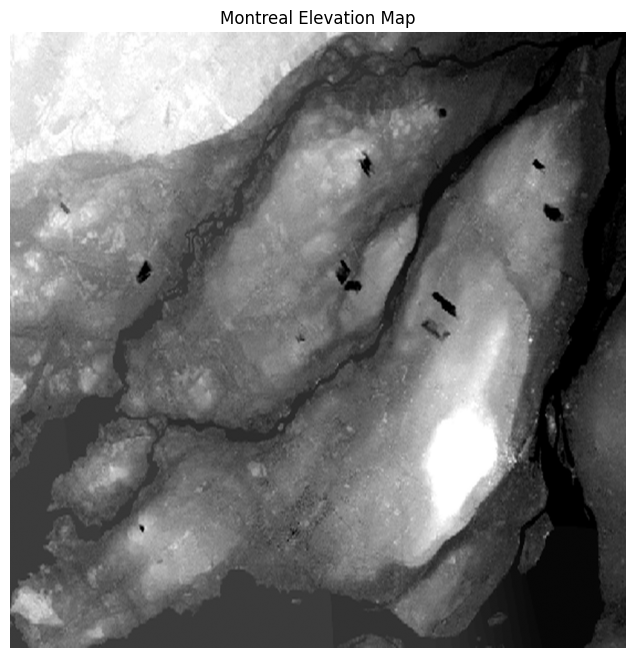

✅ PNG saved in Google Drive: /content/drive/MyDrive/amoebas_studio/img/Elevation/Unknown_Montreal_elevation.png
✅ Metadata saved in Google Drive: /content/drive/MyDrive/amoebas_studio/img/Metadata/Unknown_Montreal_metadata.txt
🔄 Generating street layout map...
✅ All necessary directories are set up in Google Drive.
❌ Error generating street layout for Montreal, Unknown: Nominatim did not geocode query 'Montreal, Unknown' to a geometry of type (Multi)Polygon.
⚠️ Skipping Montreal, Unknown due to missing street data.
❌ Error processing Montreal, Unknown: Missing street data for Montreal, Unknown
🚨 Stopping execution due to error.


In [ ]:
import os
import time

# ✅ Loop through the list of cities and generate maps
for index, row in df_cities.iterrows():
    city = row["City"]
    country = row["Country"] if "Country" in row else "Unknown"  # Ensure country column exists

    print(f"\n🌍 Processing: {city}, {country}...\n")

    try:
        # ✅ Get correct file paths
        paths = define_file_paths(city, country)
        elevation_png_file = paths["elevation_png"]  # Elevation PNG (stored in /Elevation/)
        elevation_tiff_file = paths["elevation_tiff"]  # Elevation TIFF (stored in /Elevation_TIFF/)
        street_file = paths["layout_png"]  # Street layout PNG (stored in /Layout/)
        overlay_file = paths["overlay_png"]  # Overlay PNG (stored in /Overlap/)
        npy_file = paths["elevation_npy"]  # NumPy elevation array (stored in /Numpy/)
        metadata_file = paths["metadata_txt"]  # Metadata file (stored in /Metadata/)

        # ✅ Check if overlay already exists, skip if so
        if os.path.exists(overlay_file):
            print(f"⚠️ {city}, {country} already processed, skipping...")
            continue

        # ✅ Generate Elevation Data (TIFF, PNG, NumPy)
        print("🔄 Generating elevation data (TIFF, PNG, NumPy)...")
        elevation_result = generate_elevation_numpy(city, country)
        if elevation_result is None:
            print(f"⚠️ Skipping {city}, {country} due to missing elevation data.")
            raise Exception(f"Missing elevation data for {city}, {country}")

        # ✅ Ensure TIFF file is saved
        if not os.path.exists(elevation_tiff_file):
            print(f"❌ Error: Elevation TIFF file for {city}, {country} was not saved!")
            raise Exception(f"Elevation TIFF file missing for {city}, {country}")

        # ✅ Generate Street Layout Map
        print("🔄 Generating street layout map...")
        street_result = generate_street_layout(city, country)
        if street_result is None:
            print(f"⚠️ Skipping {city}, {country} due to missing street data.")
            raise Exception(f"Missing street data for {city}, {country}")

        # ✅ Generate Overlay of Topography & Street Layout
        print("🔄 Generating overlay map...")
        overlay_result = overlay_maps(city, country)
        if overlay_result is None:
            print(f"⚠️ Skipping {city}, {country} due to overlay generation failure.")
            raise Exception(f"Overlay generation failed for {city}, {country}")

        print(f"✅ Completed: {city}, {country} ✅\n")

        # ✅ Add a short delay to avoid API rate limits
        time.sleep(2)

    except Exception as e:
        print(f"❌ Error processing {city}, {country}: {e}")
        print("🚨 Stopping execution due to error.")
        break  # 🚨 Stops execution if an error occurs


# ovarlap trial for samara

In [ ]:
# Define the city for testing
city_name = "Samara"
country_name = "Russia"

# Step 1: Generate Elevation Data (TIFF, PNG, NumPy)
print("🔄 Generating elevation data (TIFF, PNG, NumPy)...")
elevation_result = generate_elevation_numpy(city_name, country_name)

# Step 2: Generate Street Layout Map
print("🔄 Generating street layout map...")
street_result = generate_street_layout(city_name, country_name)

# Step 3: Generate Overlay of Topography & Street Layout
print("🔄 Generating overlay map...")
overlay_result = overlay_maps(city_name, country_name)

# ✅ Display the outputs if successfully generated
if elevation_result:
    elevation_file = elevation_result[1]  # PNG file path
    img = Image.open(elevation_file)
    img.show()

if street_result:
    img = Image.open(street_result)
    img.show()

if overlay_result:
    img = Image.open(overlay_result)
    img.show()


🔄 Generating elevation data (TIFF, PNG, NumPy)...
🔍 Fetching bounding box for Samara...
✅ Bounding box confirmed, generating elevation map...
✅ All necessary directories are set up in Google Drive.
Generating URL ...
Please wait ...
Data downloaded to /content/drive/MyDrive/amoebas_studio/img/Elevation_TIFF/Russia_Samara_elevation.tif
✅ GeoTIFF saved: /content/drive/MyDrive/amoebas_studio/img/Elevation_TIFF/Russia_Samara_elevation.tif
✅ PNG saved: /content/drive/MyDrive/amoebas_studio/img/Elevation/Russia_Samara_elevation.png
🔄 Generating street layout map...
✅ All necessary directories are set up in Google Drive.
❌ Error generating street layout for Samara, Russia: graph_from_bbox() takes 1 positional argument but 4 positional arguments (and 1 keyword-only argument) were given
🔄 Generating overlay map...
✅ All necessary directories are set up in Google Drive.
❌ Error: Street layout for Samara, Russia not found!


In [ ]:
# Define the city for testing
city_name = "Samara"
country_name = "Russia"

# Step 1: Generate Elevation Data (TIFF, PNG, NumPy)
print("🔄 Generating elevation data (TIFF, PNG, NumPy)...")
elevation_result = generate_elevation_numpy(city_name, country_name)

# Step 2: Generate Street Layout Map
print("🔄 Generating street layout map...")
street_result = generate_street_layout(city_name, country_name)

# Step 3: Generate Overlay of Topography & Street Layout
print("🔄 Generating overlay map...")
overlay_result = overlay_maps(city_name, country_name)

# Display the outputs if successfully generated
if elevation_result:
    elevation_file = elevation_result[1]  # PNG file path
    img = Image.open(elevation_file)
    img.show()

if street_result:
    img = Image.open(street_result)
    img.show()

if overlay_result:
    img = Image.open(overlay_result)
    img.show()

🔄 Generating elevation data (TIFF, PNG, NumPy)...
🔍 Fetching bounding box for Samara...
✅ Bounding box confirmed, generating elevation map...
✅ All necessary directories are set up in Google Drive.
Generating URL ...
Please wait ...
Data downloaded to /content/drive/MyDrive/amoebas_studio/img/Elevation_TIFF/Russia_Samara_elevation.tif
✅ GeoTIFF saved: /content/drive/MyDrive/amoebas_studio/img/Elevation_TIFF/Russia_Samara_elevation.tif
✅ PNG saved: /content/drive/MyDrive/amoebas_studio/img/Elevation/Russia_Samara_elevation.png
🔄 Generating street layout map...
✅ All necessary directories are set up in Google Drive.
❌ Error generating street layout for Samara: graph_from_bbox() got an unexpected keyword argument 'north'
🔄 Generating overlay map...
✅ All necessary directories are set up in Google Drive.


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



🌍 Processing: Karachi...

🔄 Generating elevation map...
🔍 Searching for Karachi in OpenStreetMap...
✅ City boundary found! Clipping elevation map to Karachi...
Generating URL ...
Please wait ...
Data downloaded to /content/drive/MyDrive/amoebas_studio/img/Elevation/Karachi_elevation.tif
✅ GeoTIFF saved: /content/drive/MyDrive/amoebas_studio/img/Elevation/Karachi_elevation.tif
✅ NumPy array saved: /content/drive/MyDrive/amoebas_studio/img/Numpy/Karachi_elevation.npy


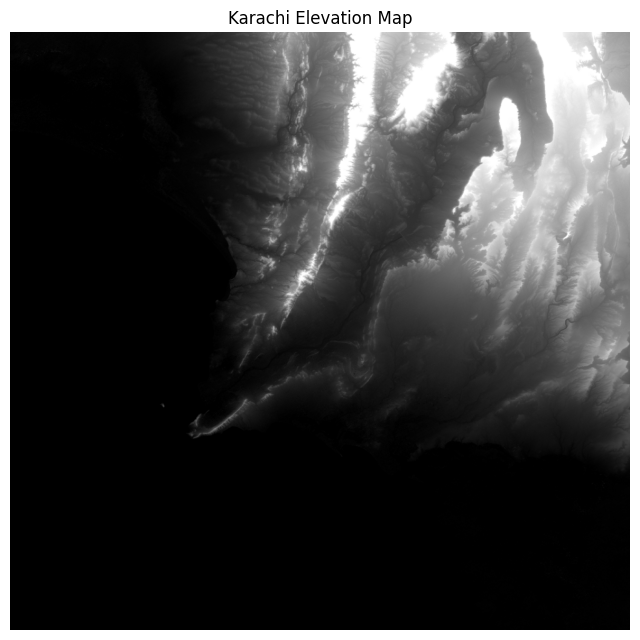

✅ PNG saved: /content/drive/MyDrive/amoebas_studio/img/Layout/Karachi_street_network.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

🔄 Generating street layout map...


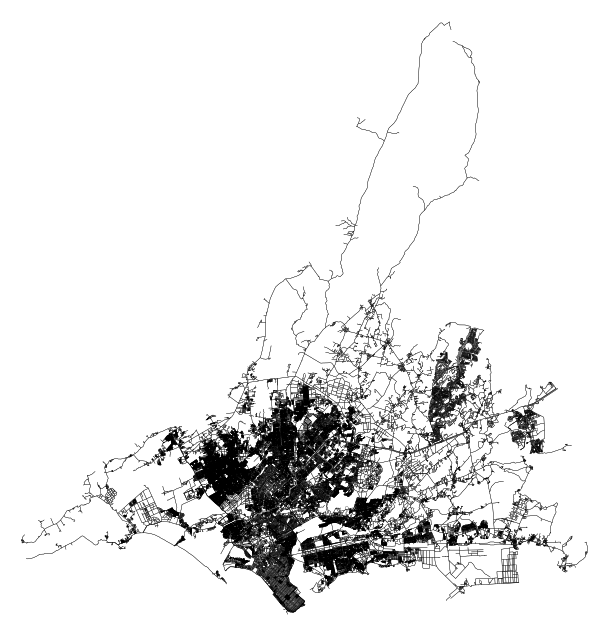

🔄 Generating overlay map...
❌ Error: Elevation map for Karachi not found!
⚠️ Skipping Karachi due to overlay generation failure.

🌍 Processing: Madrid...

🔄 Generating elevation map...
🔍 Searching for Madrid in OpenStreetMap...
✅ City boundary found! Clipping elevation map to Madrid...
Generating URL ...
Please wait ...
Data downloaded to /content/drive/MyDrive/amoebas_studio/img/Elevation/Madrid_elevation.tif
✅ GeoTIFF saved: /content/drive/MyDrive/amoebas_studio/img/Elevation/Madrid_elevation.tif
✅ NumPy array saved: /content/drive/MyDrive/amoebas_studio/img/Numpy/Madrid_elevation.npy


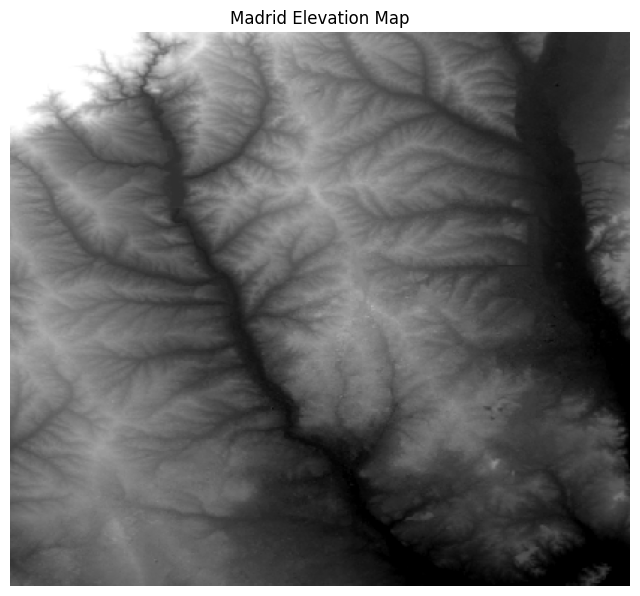

✅ PNG saved: /content/drive/MyDrive/amoebas_studio/img/Layout/Madrid_street_network.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

🔄 Generating street layout map...


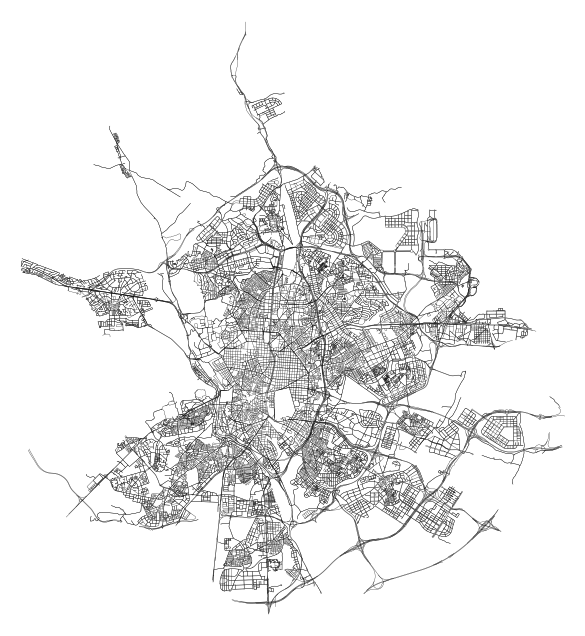

🔄 Generating overlay map...
❌ Error: Elevation map for Madrid not found!
⚠️ Skipping Madrid due to overlay generation failure.

🌍 Processing: Samara...

🔄 Generating elevation map...
🔍 Searching for Samara in OpenStreetMap...
✅ City boundary found! Clipping elevation map to Samara...
Generating URL ...
Please wait ...
Data downloaded to /content/drive/MyDrive/amoebas_studio/img/Elevation/Samara_elevation.tif
✅ GeoTIFF saved: /content/drive/MyDrive/amoebas_studio/img/Elevation/Samara_elevation.tif
✅ NumPy array saved: /content/drive/MyDrive/amoebas_studio/img/Numpy/Samara_elevation.npy


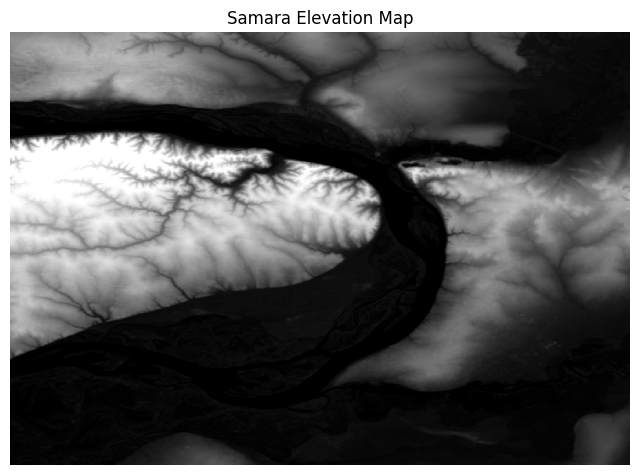

✅ PNG saved: /content/drive/MyDrive/amoebas_studio/img/Layout/Samara_street_network.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

🔄 Generating street layout map...


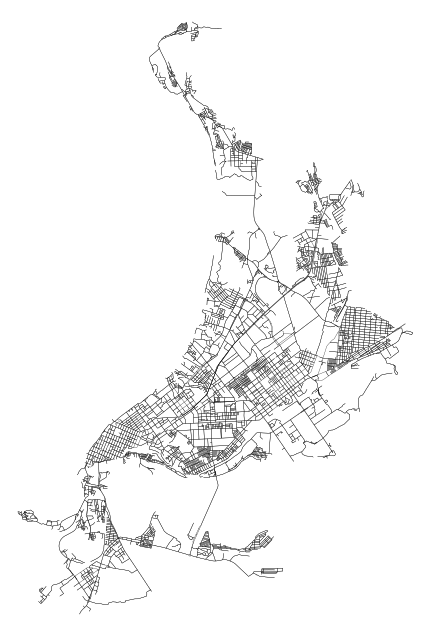

🔄 Generating overlay map...
❌ Error: Elevation map for Samara not found!
⚠️ Skipping Samara due to overlay generation failure.

🌍 Processing: Omsk...

🔄 Generating elevation map...
🔍 Searching for Omsk in OpenStreetMap...
✅ City boundary found! Clipping elevation map to Omsk...
Generating URL ...
Please wait ...
Data downloaded to /content/drive/MyDrive/amoebas_studio/img/Elevation/Omsk_elevation.tif
✅ GeoTIFF saved: /content/drive/MyDrive/amoebas_studio/img/Elevation/Omsk_elevation.tif
✅ NumPy array saved: /content/drive/MyDrive/amoebas_studio/img/Numpy/Omsk_elevation.npy


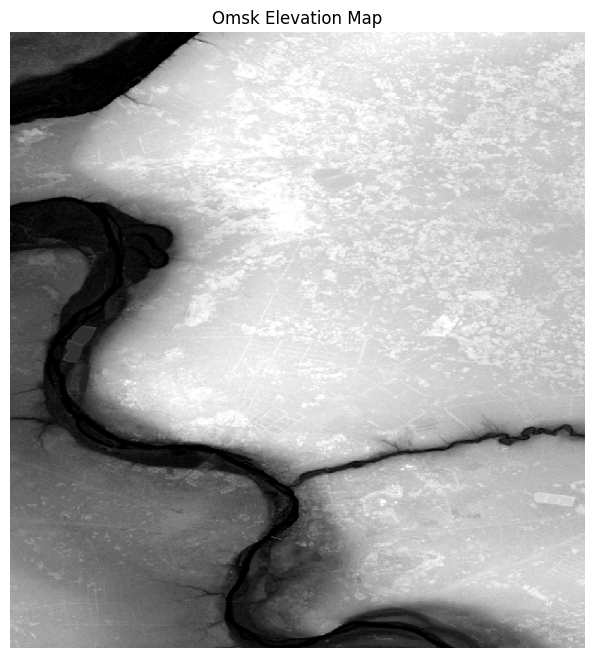

✅ PNG saved: /content/drive/MyDrive/amoebas_studio/img/Layout/Omsk_street_network.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

🔄 Generating street layout map...


KeyboardInterrupt: 

In [ ]:
import os
import time

# ✅ Loop through the list of cities and generate maps
for city in df_cities["City"]:
    print(f"\n🌍 Processing: {city}...\n")

    try:
        # Define file paths
        elevation_file = f"/content/drive/MyDrive/amoebas_studio/img/Elevation/{city}_elevation.png"
        street_file = f"/content/drive/MyDrive/amoebas_studio/img/Layout/{city}_street_network.png"
        overlay_file = f"/content/drive/MyDrive/amoebas_studio/img/Overlap/{city}_overlay.png"
        npy_file = f"/content/drive/MyDrive/amoebas_studio/img/Numpy/{city}_elevation.npy"

        # ✅ Check if files already exist to skip processing
        if os.path.exists(overlay_file):
            print(f"⚠️ {city} already processed, skipping...")
            continue

        # ✅ Generate Topography (Elevation) Map
        print("🔄 Generating elevation map...")
        elevation_result = generate_elevation_numpy(city)
        if elevation_result is None:
            print(f"⚠️ Skipping {city} due to missing elevation data.")
            continue

        # ✅ Generate Street Layout Map
        print("🔄 Generating street layout map...")
        street_result = generate_street_layout(city)
        if street_result is None:
            print(f"⚠️ Skipping {city} due to missing street data.")
            continue

        # ✅ Generate Overlay of Topography & Street Layout
        print("🔄 Generating overlay map...")
        overlay_result = overlay_maps(city)
        if overlay_result is None:
            print(f"⚠️ Skipping {city} due to overlay generation failure.")
            continue

        print(f"✅ Completed: {city} ✅\n")

        # ✅ Add a short delay to avoid API rate limits
        time.sleep(2)

    except Exception as e:
        print(f"❌ Error processing {city}: {e}")


chat JSON prompt:

In [ ]:
prompt_template = """
You are a helpfull assistant. Try your best to fullfill the user query. To empower
you further you can use the "generateGeoData" tool. in oder to use it answer in the following
JSON format:

{"message":"your regular message to  the user",
"tool":"generateGeoData"
"args":{"operation_type":"layout", "city_name":"Barcelona"}
}

if you dont need to use the tool or you have already used it and retreived its anwser, leave "tool" and "args" empty. If you use the tool
use the message field to explain your argument choices.
The argument operation_type can either be "layout" (to get the map of the streets of a city) or
topography to the the topographical features of the city.

Ensure to always answer in exactly that json fomrat. Do not add any comments or thoughts.
Below is the user query:
"""

# **GRADIO**

In [ ]:
import gradio as gr

# ✅ Function to detect user intent (Street Layout or Topography)
def detect_intent(prompt):
    system_message = {
        "role": "system",
        "content": "You are an AI that determines whether the user wants a 'street layout' or 'topography' of a city."
    }
    user_message = {
        "role": "user",
        "content": prompt
    }

    response = openai.ChatCompletion.create(
        model="gpt-4o",
        messages=[system_message, user_message]
    )

    intent = response["choices"][0]["message"]["content"].lower()

    if "street" in intent:
        return "layout"
    elif "topo" in intent or "elevation" in intent:
        return "topography"
    else:
        return "unknown"

# ✅ Function to generate the correct map based on user input
def generate_map(prompt):
    city_name = prompt.split("of")[-1].strip()  # Extract city name from prompt
    operation_type = detect_intent(prompt)

    if operation_type == "layout":
        image_path = generate_street_layout(city_name)
        return image_path, image_path
    elif operation_type == "topography":
        image_path = generate_elevation_map(city_name)
        return image_path, image_path
    else:
        return "Could not understand your request.", None

# ✅ Gradio App UI
with gr.Blocks() as app:
    gr.Markdown("# 🗺️ City Map Generator (Street Layout & Topography)")

    with gr.Row():
        prompt_input = gr.Textbox(label="Enter a prompt", placeholder="e.g., I want the street layout of Barcelona")
        generate_button = gr.Button("Generate Map")

    with gr.Row():
        image_output = gr.Image(label="Generated Map", type="filepath")
        file_output = gr.File(label="Download Image")

    generate_button.click(fn=generate_map, inputs=[prompt_input], outputs=[image_output, file_output])

# ✅ Launch Gradio in Colab
app.launch(share=True)
